<a href="https://colab.research.google.com/github/Psubrat98/ML-Projects-With-Python/blob/main/Deep%20Learning/MY%20Project/Solar%20PV%20Panel/Solar_PV_Module_Image_clasification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [3]:
IMAGE_SIZE = [224, 224]

In [4]:
train_path = '/content/drive/MyDrive/ML Project/Solar Pv Module/My Test set 1/train'
valid_path = '/content/drive/MyDrive/ML Project/Solar Pv Module/My Test set 1/val'

In [5]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [6]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [7]:
 # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/ML Project/Solar Pv Module/My Test set 1/train/*')

In [8]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [10]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [11]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/ML Project/Solar Pv Module/My Test set 1/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 244 images belonging to 3 classes.


In [14]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/ML Project/Solar Pv Module/My Test set 1/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 26 images belonging to 3 classes.


In [23]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-23-69229fe26ea3>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
8/8 [==============================] - 50s 6s/step - loss: 1.1616 - accuracy: 0.4344 - val_loss: 1.0478 - val_accuracy: 0.3846
Epoch 2/50
8/8 [==============================] - 52s 7s/step - loss: 0.8826 - accuracy: 0.5738 - val_loss: 0.7875 - val_accuracy: 0.3846
Epoch 3/50
8/8 [==============================] - 50s 6s/step - loss: 0.8825 - accuracy: 0.5287 - val_loss: 0.6509 - val_accuracy: 0.8846
Epoch 4/50
8/8 [==============================] - 50s 6s/step - loss: 0.9977 - accuracy: 0.5205 - val_loss: 0.6713 - val_accuracy: 0.5769
Epoch 5/50
8/8 [==============================] - 50s 6s/step - loss: 0.9870 - accuracy: 0.6107 - val_loss: 0.8952 - val_accuracy: 0.3846
Epoch 6/50
8/8 [==============================] - 52s 7s/step - loss: 1.0404 - accuracy: 0.4795 - val_loss: 1.0516 - val_accuracy: 0.4231
Epoch 7/50
8/8 [==============================] - 50s 6s/step - loss: 0.8569 - accuracy: 0.6107 - val_loss: 0.6819 - val_accuracy: 0.6923
Epoch 8/50
8/8 [==================

In [24]:
import matplotlib.pyplot as plt

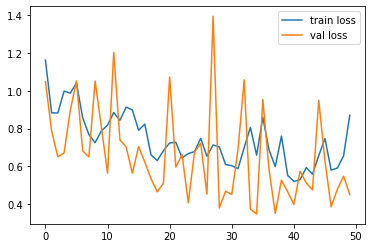

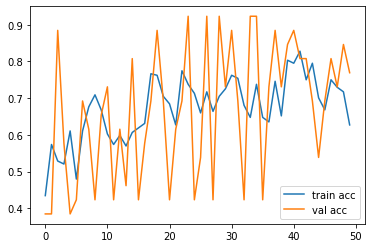

<Figure size 432x288 with 0 Axes>

In [25]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [26]:
from tensorflow.keras.models import load_model

model.save('model_Solar_PV_resnet50.h5')

In [29]:
y_pred = model.predict(test_set)

1/1 [==============================] - 5s 5s/step


In [30]:
y_pred

array([[4.0732443e-01, 5.3004700e-01, 6.2628657e-02],
       [8.5915899e-01, 3.1805169e-03, 1.3766038e-01],
       [7.2552203e-03, 3.3736637e-06, 9.9274129e-01],
       [2.5920832e-01, 6.9831073e-01, 4.2480920e-02],
       [5.9848207e-01, 8.4734354e-03, 3.9304456e-01],
       [2.7315056e-01, 6.8598992e-01, 4.0859483e-02],
       [6.2969536e-01, 1.3300522e-02, 3.5700420e-01],
       [4.6361750e-01, 4.8285177e-01, 5.3530704e-02],
       [3.6054185e-01, 5.8214843e-01, 5.7309709e-02],
       [4.5526648e-01, 4.9062732e-01, 5.4106191e-02],
       [2.6992938e-01, 6.9026041e-01, 3.9810218e-02],
       [6.3823748e-01, 5.3049804e-04, 3.6123201e-01],
       [5.4185295e-01, 3.2929671e-03, 4.5485416e-01],
       [6.6452235e-01, 4.0432881e-04, 3.3507335e-01],
       [4.9863541e-01, 3.1890543e-03, 4.9817553e-01],
       [8.6595911e-01, 2.2392154e-03, 1.3180168e-01],
       [8.3831084e-01, 4.9739820e-03, 1.5671524e-01],
       [5.8031666e-01, 4.3087630e-03, 4.1537446e-01],
       [4.4688031e-01, 2.010

In [31]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [32]:
y_pred

array([1, 0, 2, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       1, 2, 0, 2])

label 0 : PV module with drop dust paticles
label 1 : PV module with less dust paticles
label 2 : PV module with more dust paticles